In [1]:
import sys
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def imshow(tit, image):
    plt.figure(figsize=(12, 8))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(tit)
    plt.axis('off')    
    plt.show()

In [3]:
DIR = './src/'

# 형태학적 처리

## 1. 침식과 팽창 연산

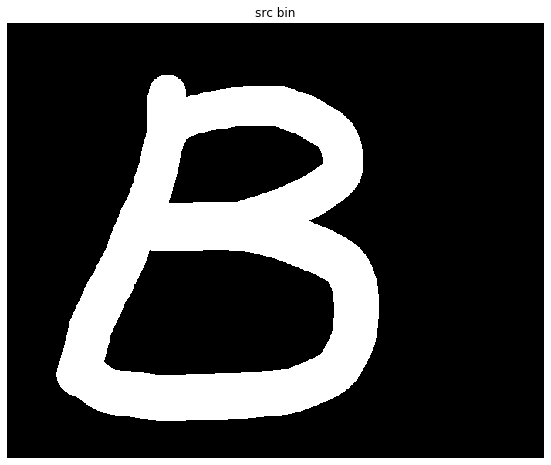

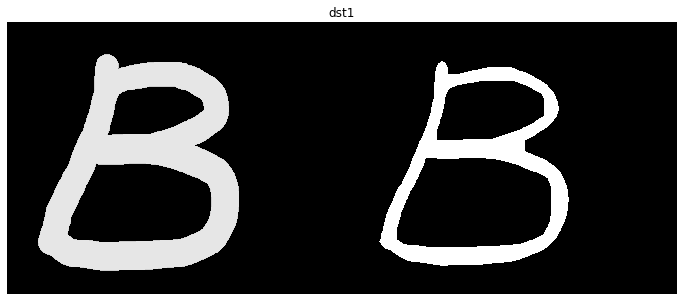

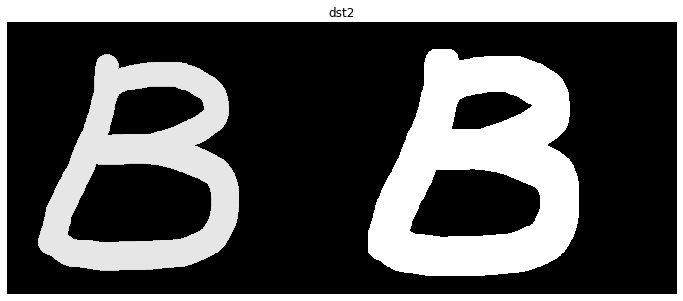

In [7]:
src = cv2.imread(DIR + 'letterb.png', cv2.IMREAD_GRAYSCALE)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imshow("src bin", src_bin)
dst1 = cv2.erode(src_bin, None)

for i in range(10):
    dst1 = cv2.erode(dst1,None)
    
    
dst2 = cv2.dilate(src_bin, None)
for i in range(10):
    dst2= cv2.dilate(dst2, None)
    
imshow("dst1",np.hstack((src,dst1)))
imshow("dst2",np.hstack((src,dst2)))

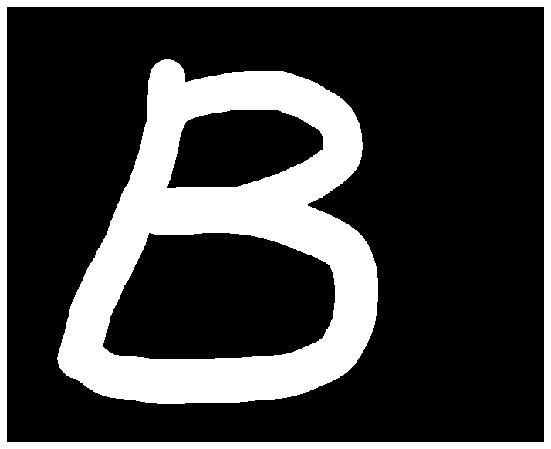

In [11]:
dst1 = cv2.erode(src_bin, None, iterations=1)
imshow("",dst1)

[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


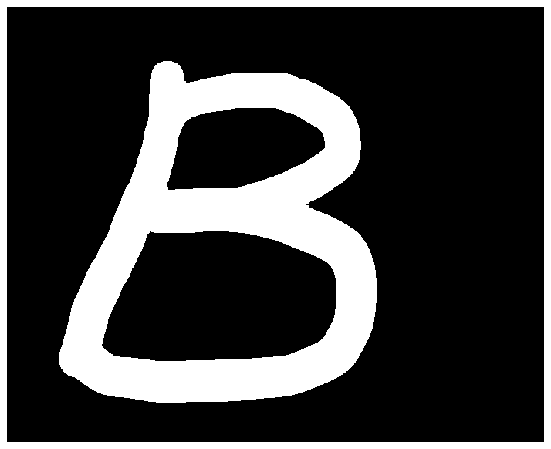

In [12]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
print(kernel)

dst1 = cv2.erode(src_bin, kernel, iterations=1)
imshow("",dst1)

## 2. open, close 연산

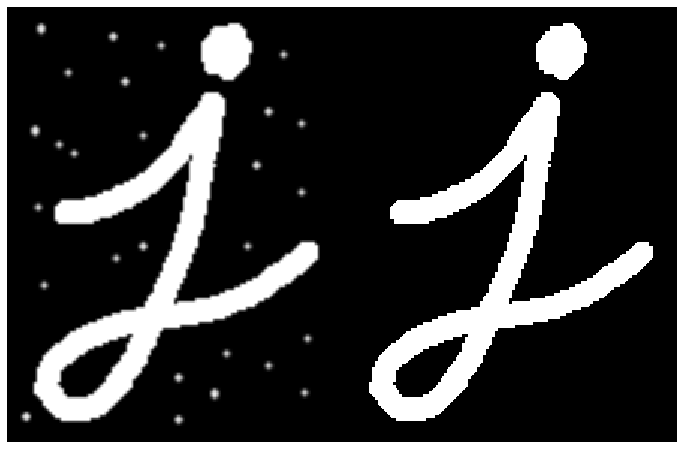

In [14]:
src = cv2.imread(DIR + 'open.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel)

imshow("", np.hstack((src, dst1)))

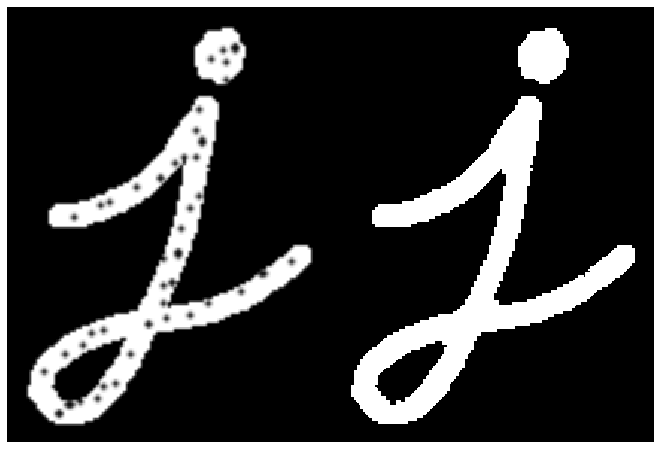

In [15]:
src = cv2.imread(DIR + 'close.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)

imshow("", np.hstack((src, dst1)))

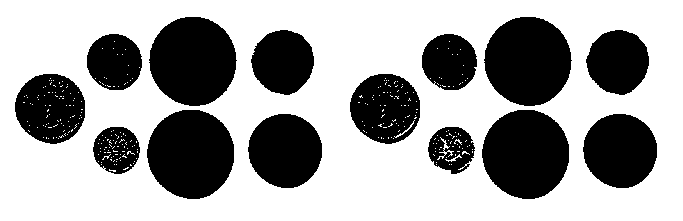

In [19]:
src = cv2.imread(DIR + 'coins.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)

imshow("", np.hstack((src_bin, dst1)))

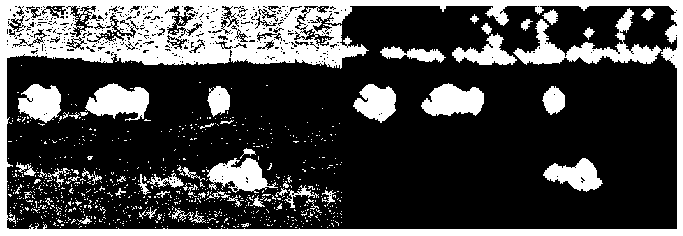

In [44]:
src = cv2.imread(DIR + 'cow.jpg', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin = 255- src_bin
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel, iterations = 2)

imshow("", np.hstack((src_bin, dst1)))

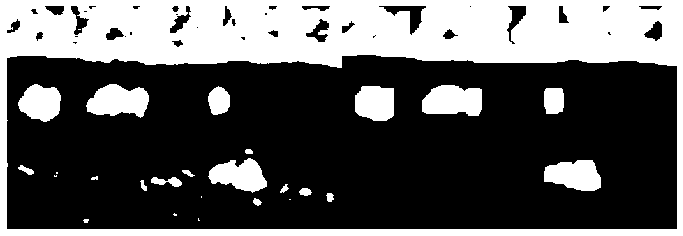

In [56]:
src = cv2.imread(DIR + 'cow.jpg', 0)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin = 255- src_bin
src_bin = cv2.medianBlur(src_bin,11)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel, iterations = 3)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, None, iterations = 7)

imshow("", np.hstack((src_bin, dst1)))

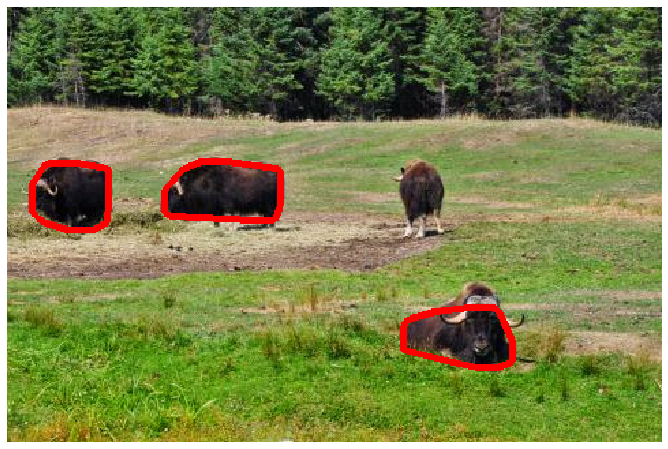

In [57]:
contours, hierarchy = cv2.findContours(dst1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

src = cv2.imread(DIR + 'cow.jpg')

for contour in contours:
    if cv2.contourArea(contour) > 1000 and cv2.contourArea(contour) < 4000:
        hull = cv2.convexHull(contour)
        cv2.drawContours(src, [hull], 0,(0,0,255), 3)
        
imshow("", src)

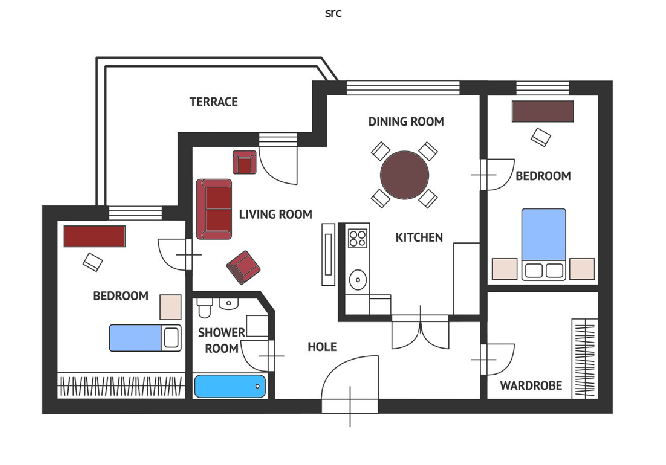

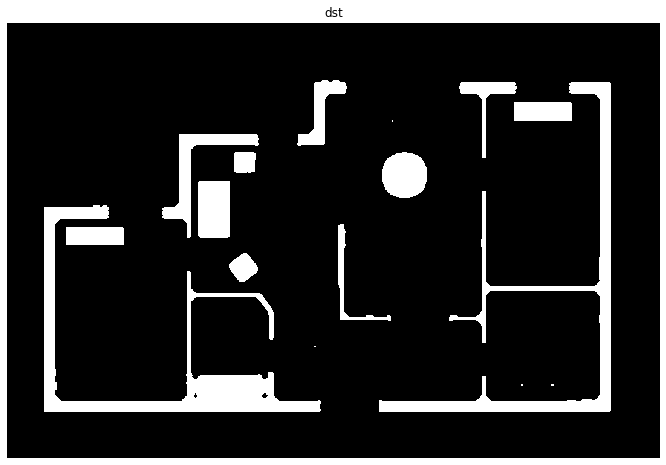

In [64]:
src = cv2.imread(DIR + 'draw.png', 0)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin = 255- src_bin
src_bin = cv2.medianBlur(src_bin,11)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, None)

src = cv2.imread(DIR + 'draw.png')
imshow("src", src)
imshow("dst", dst1)

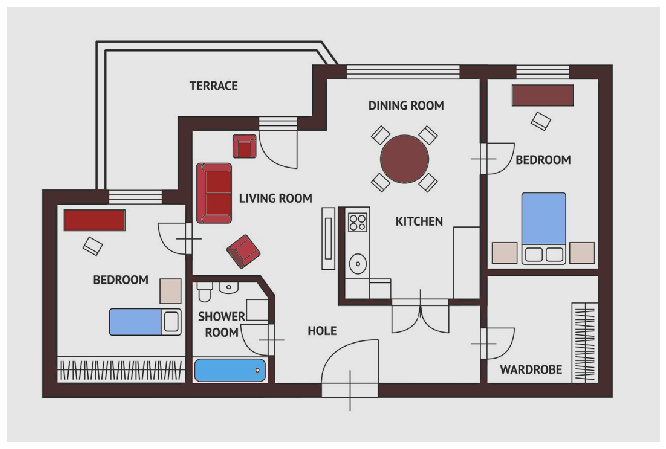

In [80]:
src = cv2.imread(DIR + 'draw.png', 0)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin = 255- src_bin
src_bin = cv2.medianBlur(src_bin,11)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, None)

col = np.zeros((dst1.shape[0], dst1.shape[1], 3), dtype="uint8")
col[:,:,2] = dst1

src = cv2.imread(DIR + 'draw.png')
dst2 = cv2.addWeighted(src, 0.9, col, 0.1, 0.0)
imshow("", dst2)

## 3. 골격화

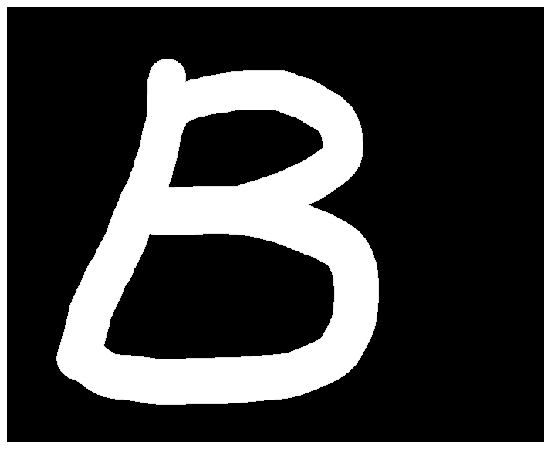

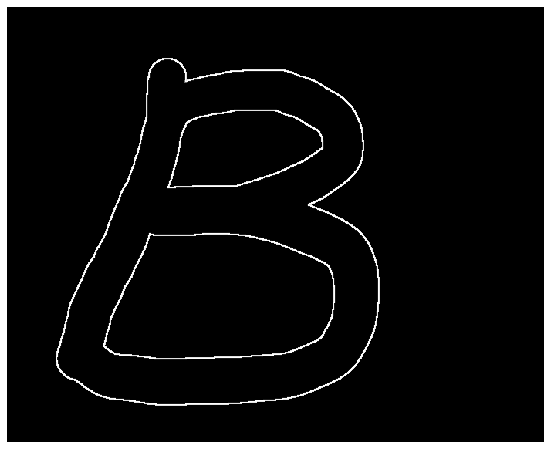

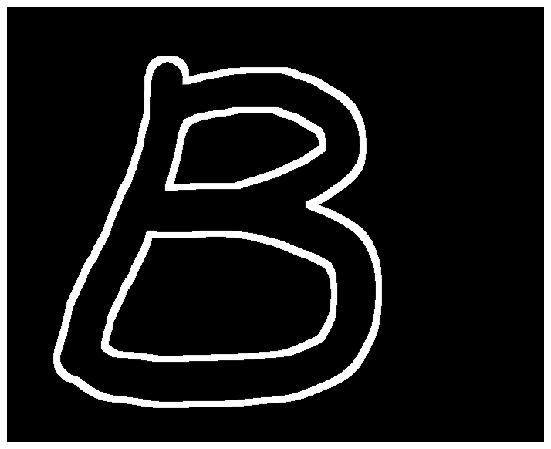

In [85]:
src = cv2.imread(DIR + 'letterb.png', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.morphologyEx(src, cv2.MORPH_GRADIENT, None)

imshow("",src)
imshow("",dst1)

dst2 = cv2.dilate(dst1, None, iterations=3)
imshow("",dst2)

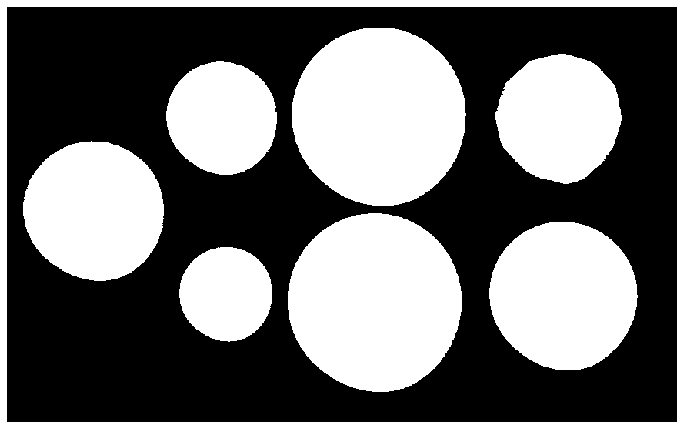

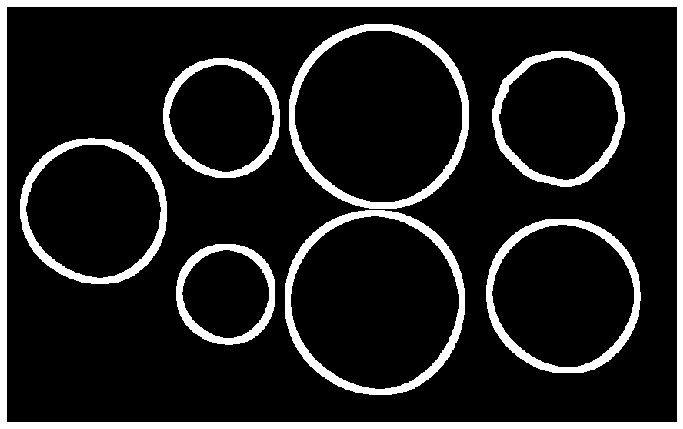

In [88]:
src = cv2.imread(DIR + 'coins.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

src_bin = 255- src_bin

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)

imshow("", dst1)

dst1 = cv2.morphologyEx(dst1, cv2.MORPH_GRADIENT, None)
dst1 = cv2.dilate(dst1, None, iterations = 3)

imshow("",dst1)

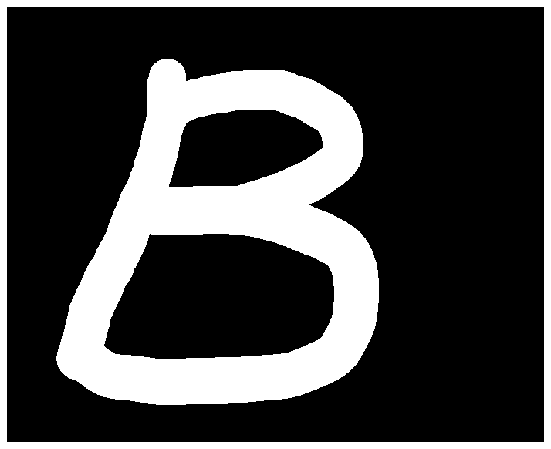

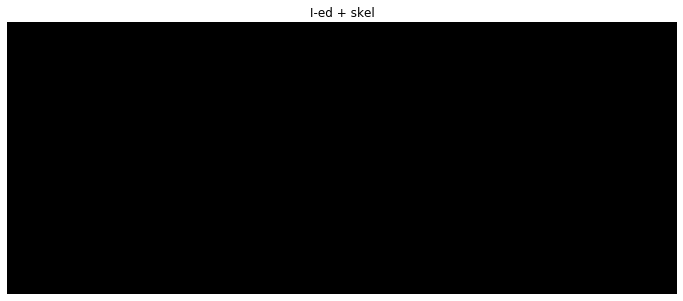

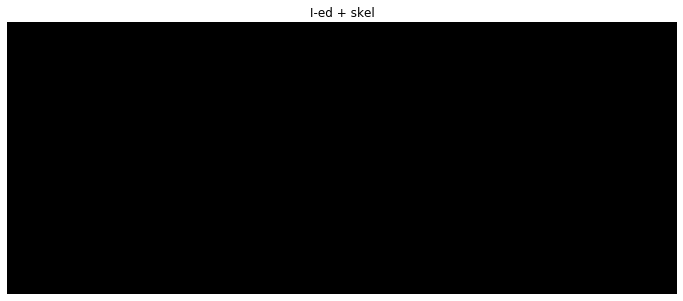

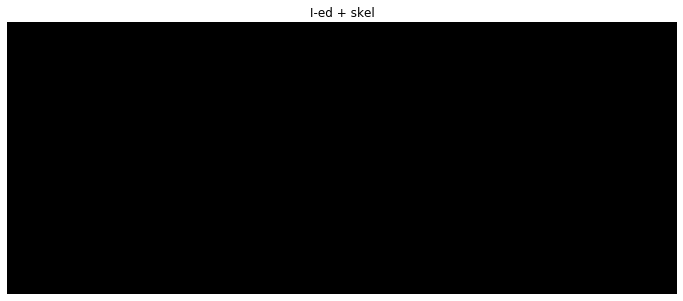

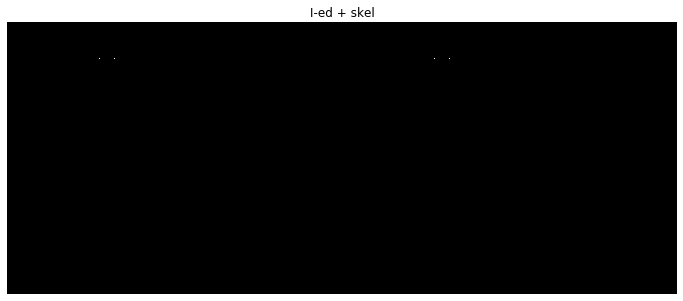

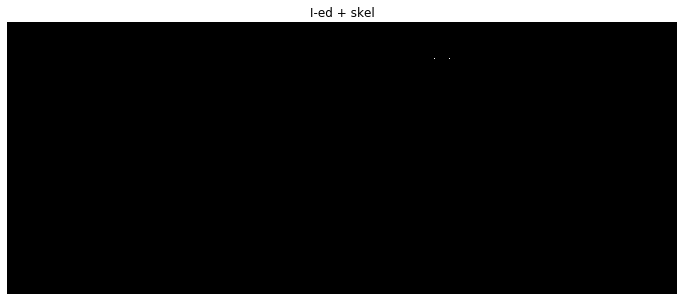

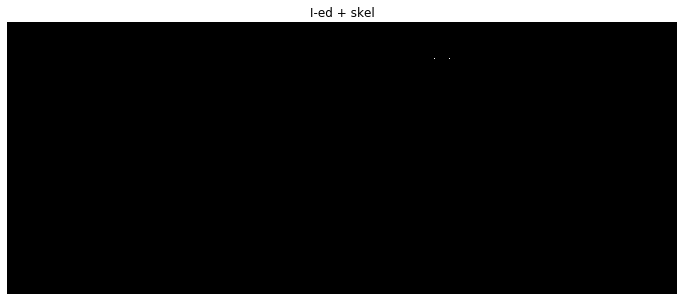

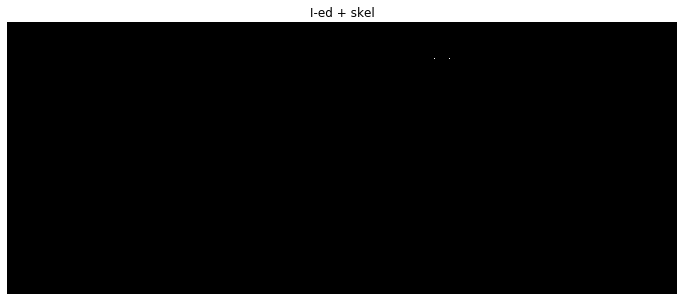

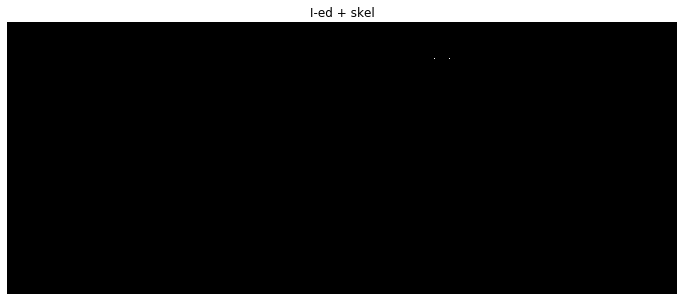

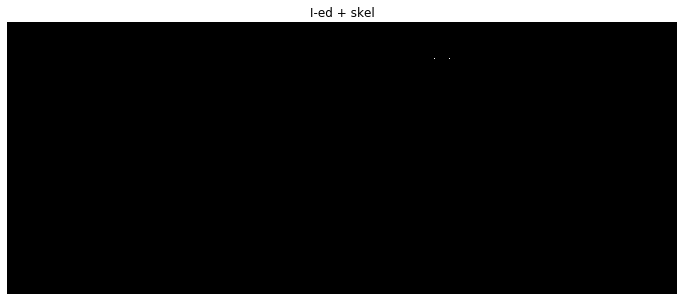

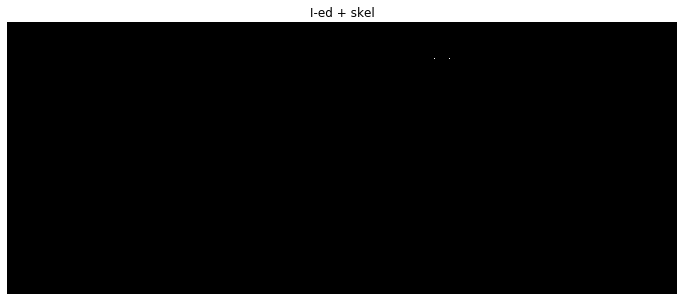

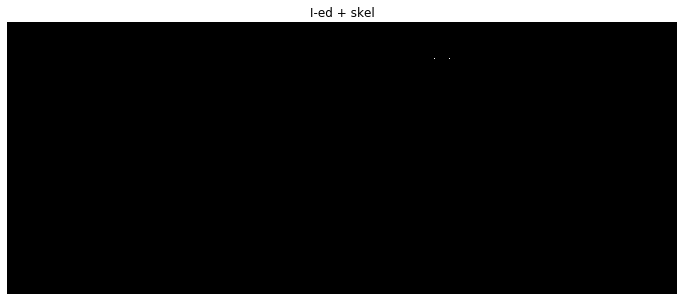

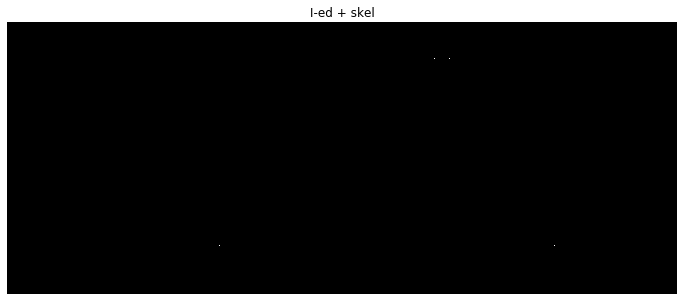

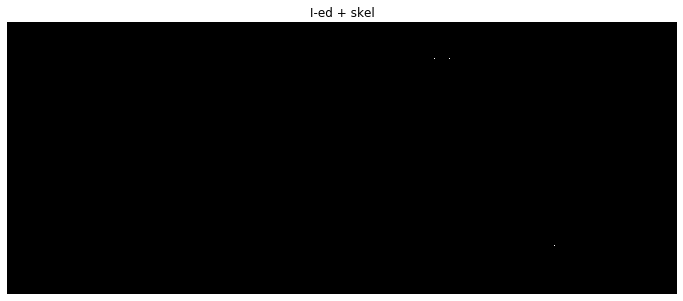

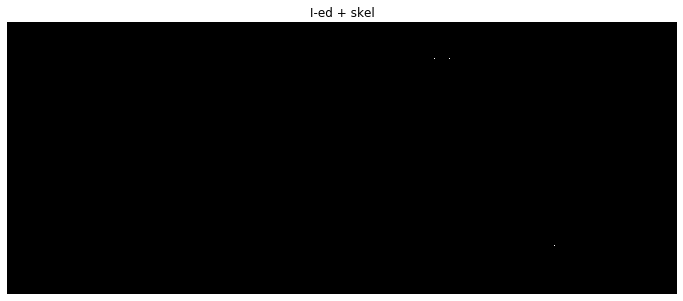

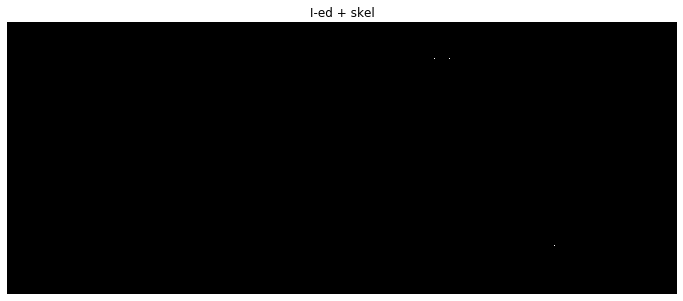

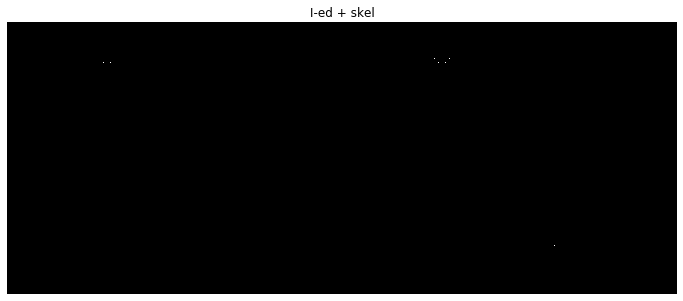

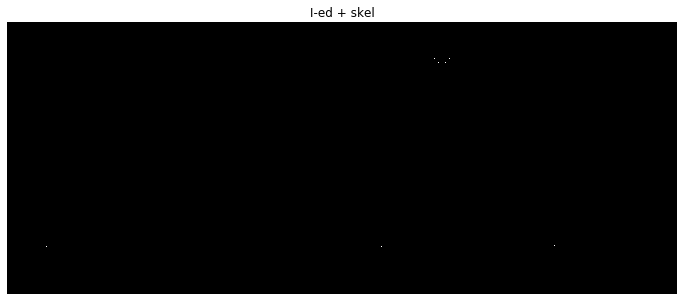

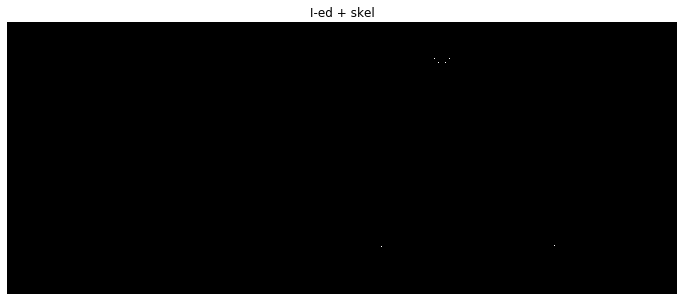

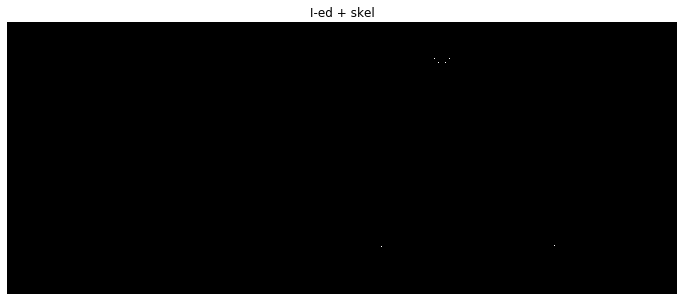

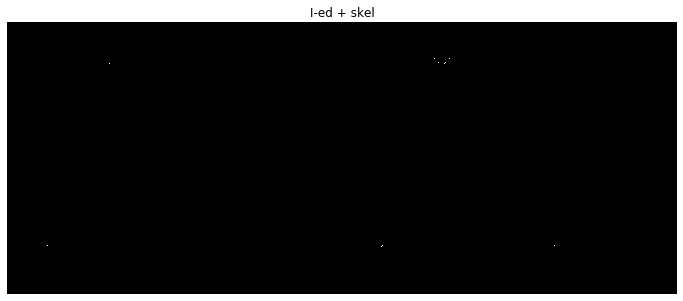

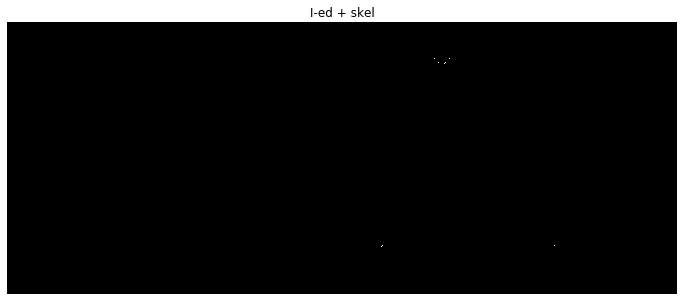

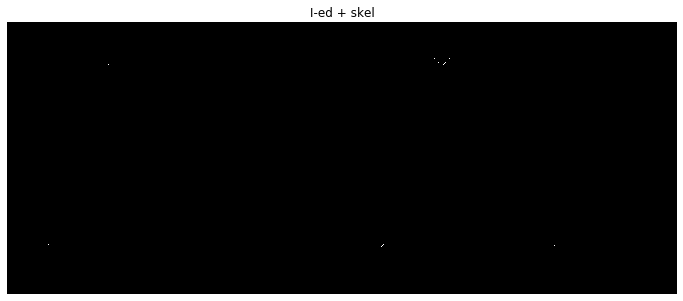

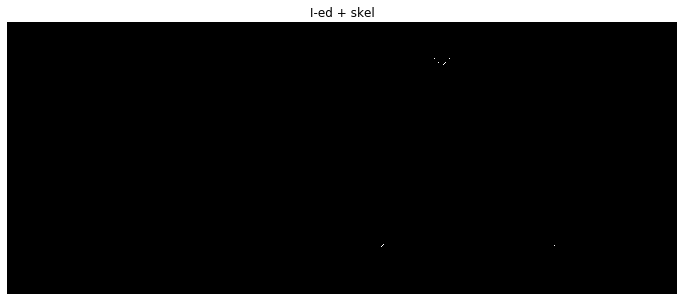

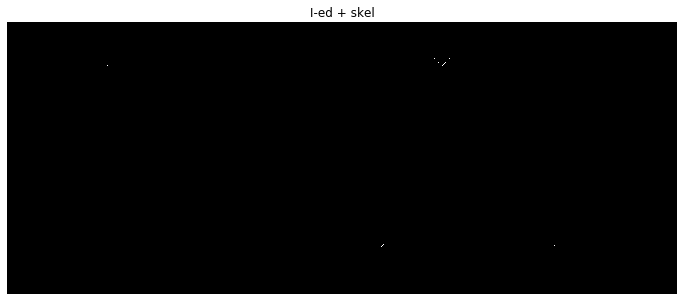

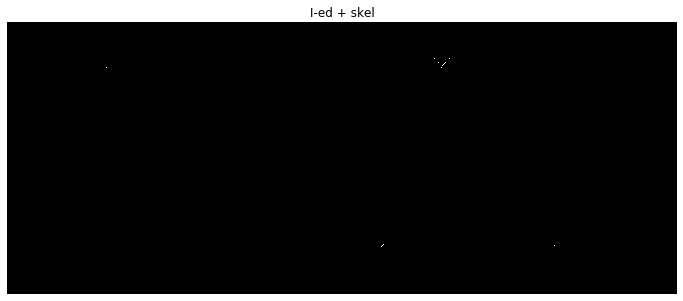

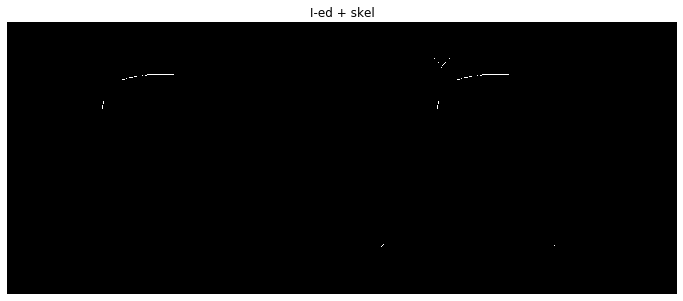

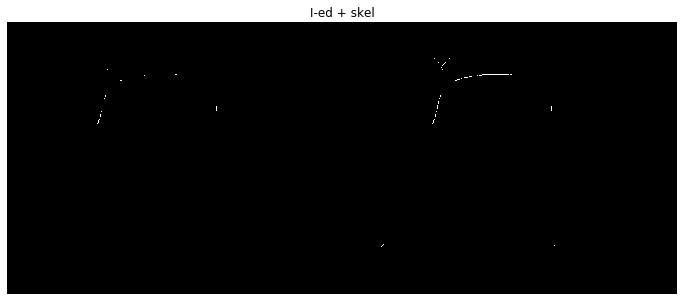

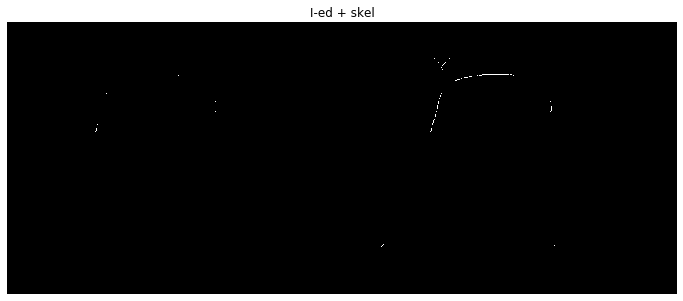

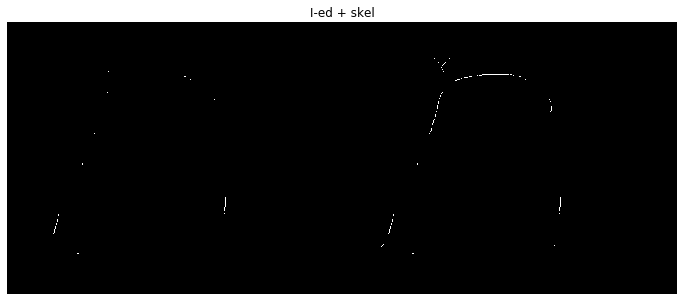

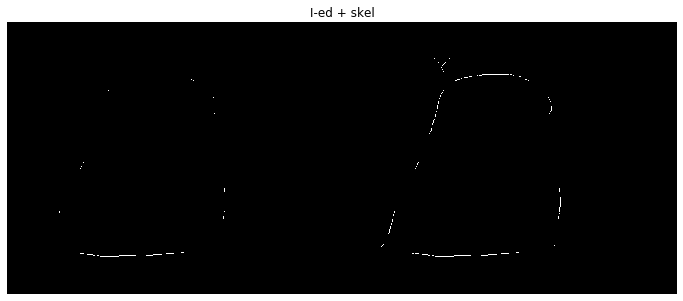

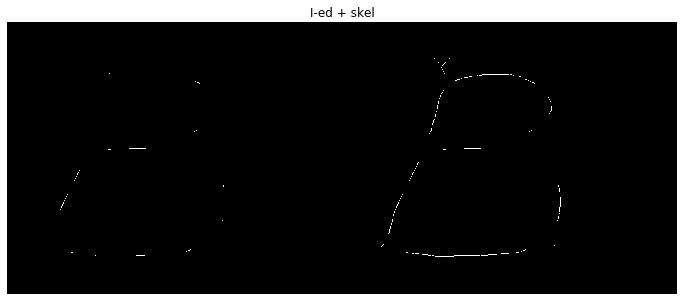

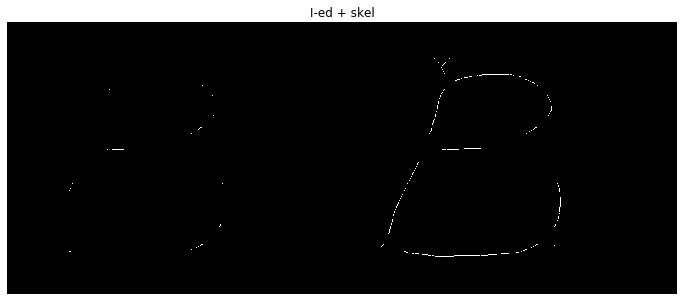

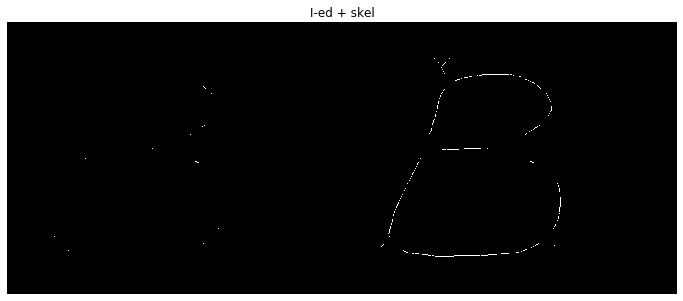

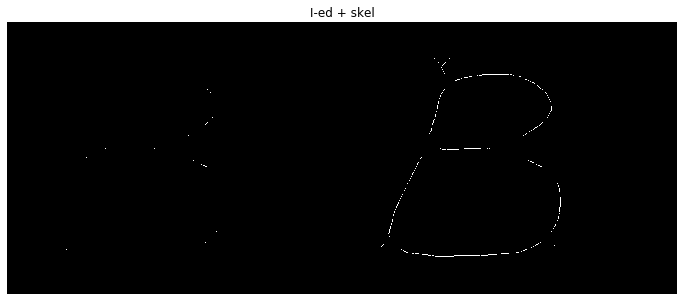

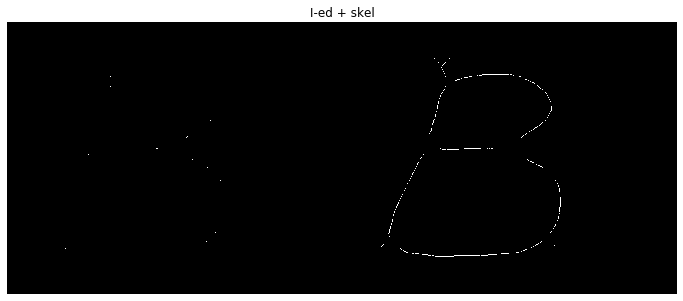

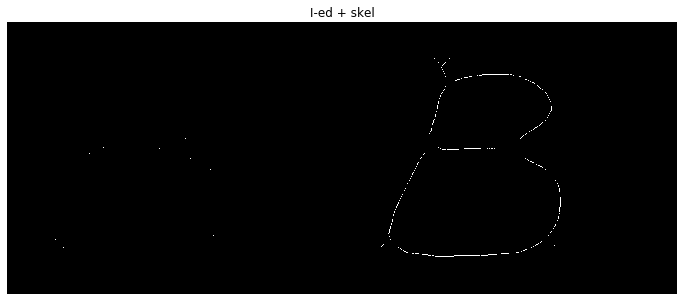

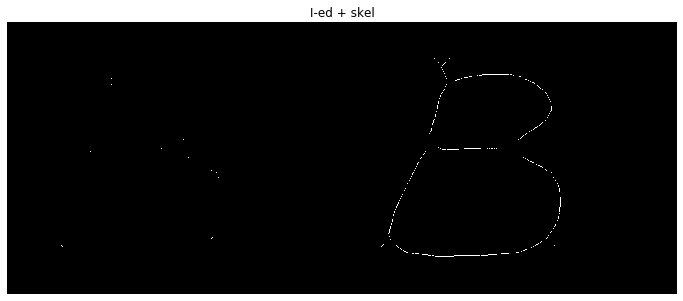

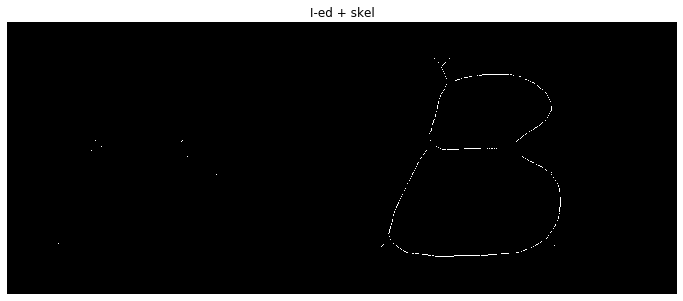

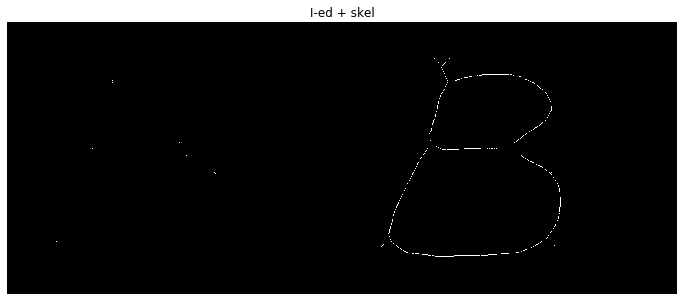

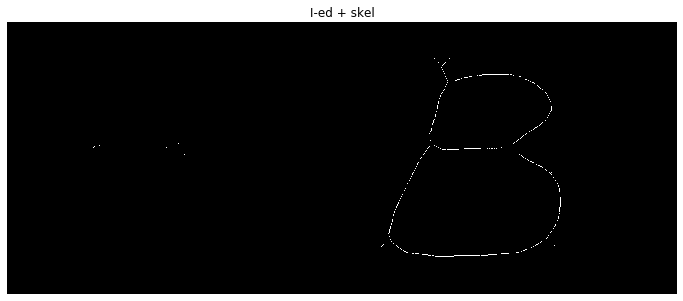

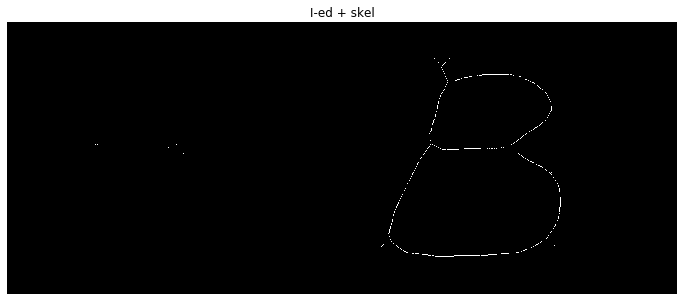

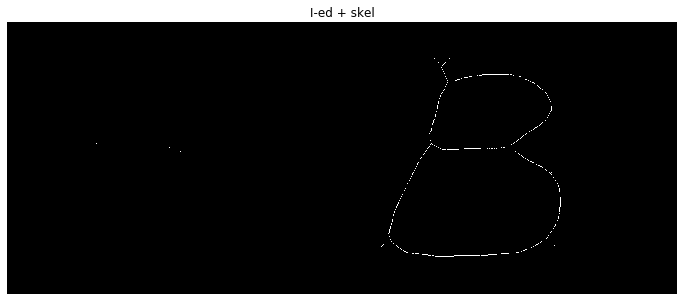

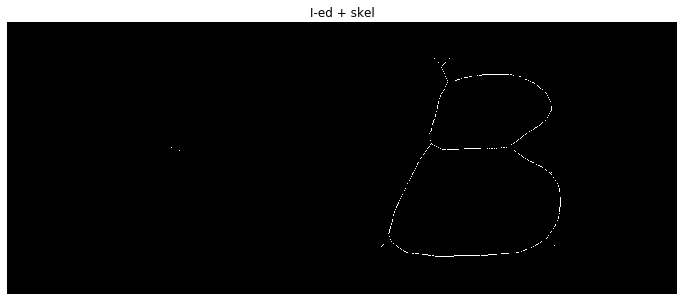

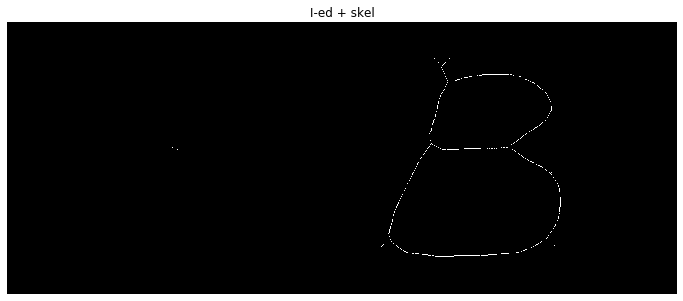

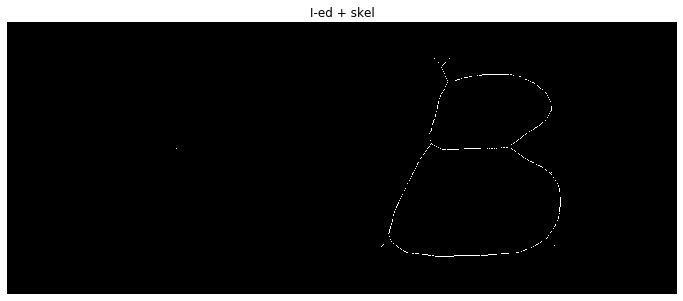

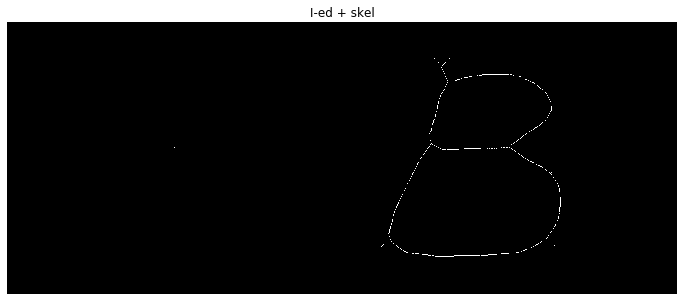

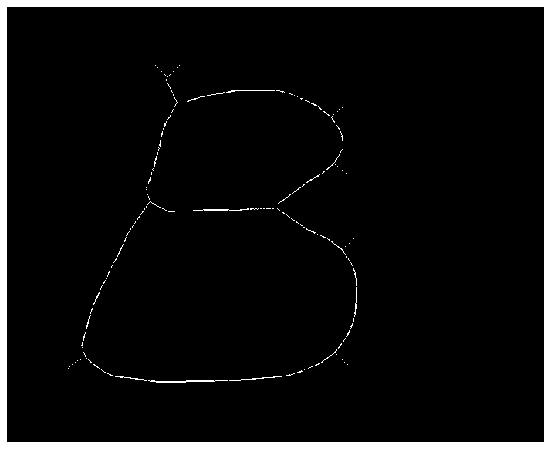

True

In [93]:
src = cv2.imread(DIR + 'letterb.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#src_bin = 255- src_bin

skel = src_bin.copy()
imshow("", src_bin)
skel[:,:] = 0
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

while True:
    eroded = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
    temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
    temp = cv2.subtract(src_bin, temp)
    skel = cv2.bitwise_or(skel, temp)
    imshow("I-ed + skel", np.hstack((temp,skel)))
    src_bin[:,:] = eroded[:,:]
    if cv2.countNonZero(src_bin) ==0:
        break
        
imshow("", skel)
cv2.imwrite("./src/out2.png",skel)

# 컬러 영상 처리

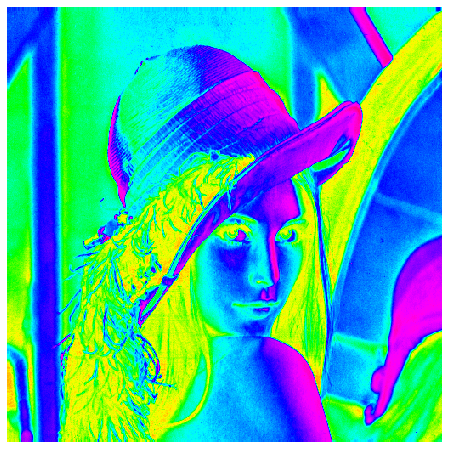

In [95]:
im_gray = cv2.imread(DIR + 'lenna.bmp', cv2.IMREAD_GRAYSCALE)
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_HSV)

imshow("", im_color)

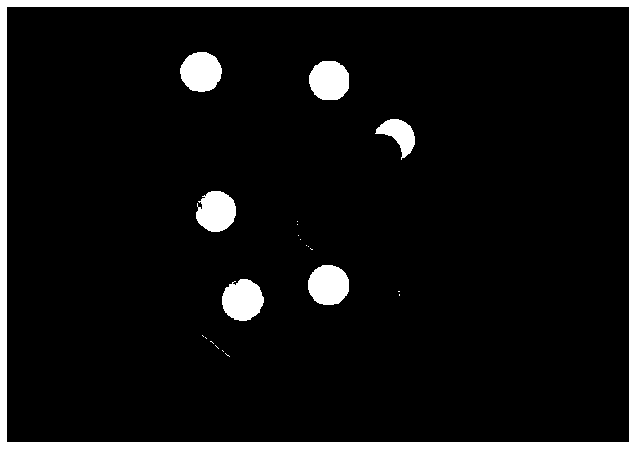

In [98]:
img = cv2.imread(DIR + 'detectcirclesexample.png')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = (0,50,50)
upper_red = (10,255,255) # 0~10을 빨강으로 봄
img_mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

imshow('', img_mask)

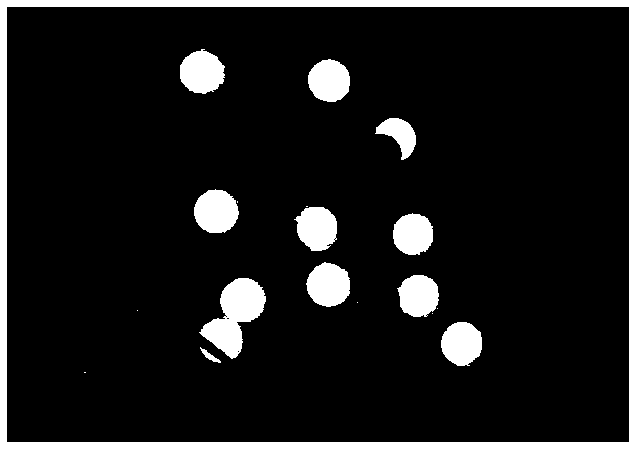

In [101]:
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255]) # 170~180도 red 범위
img_mask2 = cv2.inRange(img_hsv, lower_red, upper_red)

added_red = cv2.addWeighted(img_mask1,1.0,img_mask2,1.0,0.0 )

imshow('',added_red)

In [102]:
img = cv2.imread(DIR + 'detectcirclesexample.png')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

print(img_hsv[205,164,:])
print(img_hsv[196,329,:])

[ 29 251 250]
[112 253 253]


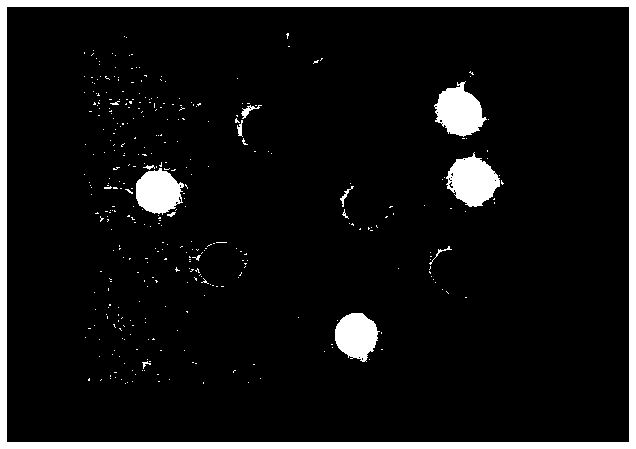

In [104]:
lower_yellow = (29-5,50,50)
upper_yellow = (29+5,255,255)

img_mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

imshow('',img_mask)

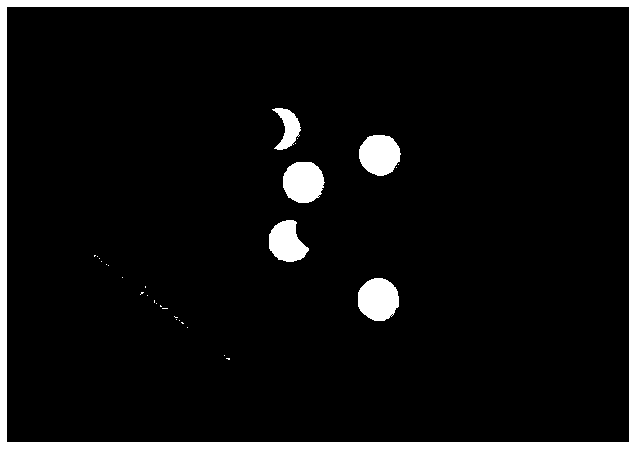

In [107]:
lower_blue = (112-5,50,50)
upper_blue = (112+5,255,255)

img_mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

imshow('',img_mask)

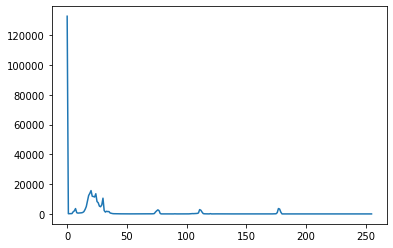

In [105]:
hist_h = cv2.calcHist([img_hsv],[0],None,[256],[0,256])
plt.plot(hist_h)

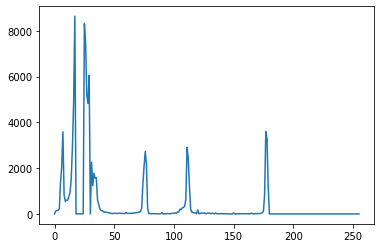

In [106]:
h = np.where( hist_h > 10000) 
hist_h[h[0]] = 0 # 히스토그램 값이 10000보다 큰 부분은 0으로 바꾸기
plt.plot(hist_h)

In [108]:
# 색상 중심값 찾기

from sklearn.cluster import KMeans

X = img_hsv[:,:,0].flatten().reshape(-1,1)
print(X.shape)

(334928, 1)


In [109]:
model = KMeans(n_clusters=7, init='random', max_iter=20).fit(X)
p = model.cluster_centers_
print(p)

[[  0.37415992]
 [111.84747465]
 [177.01485995]
 [ 17.10112006]
 [ 74.99865772]
 [ 30.33744889]
 [ 22.62887656]]


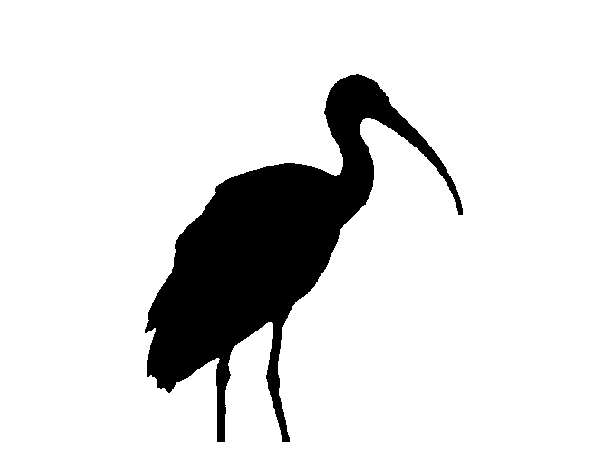

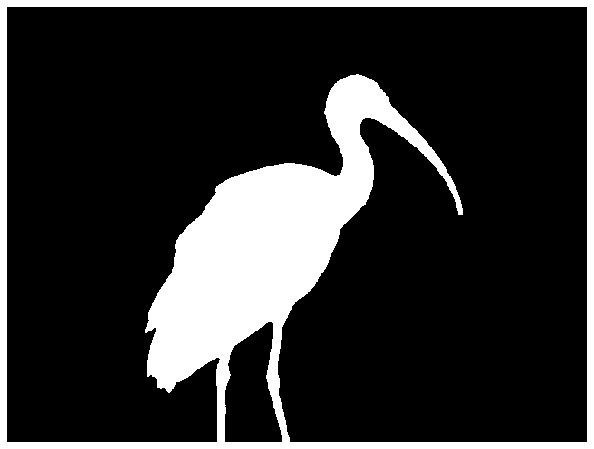

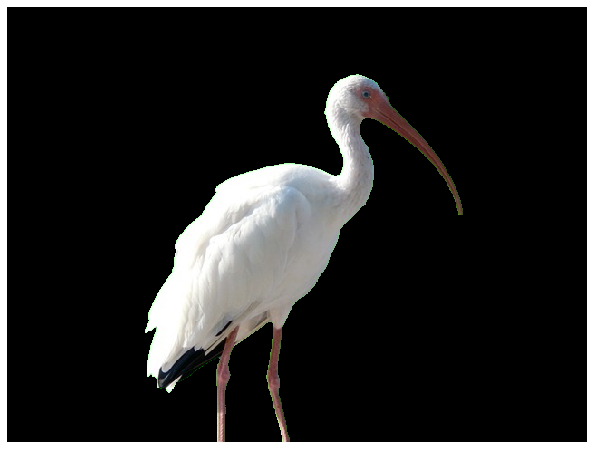

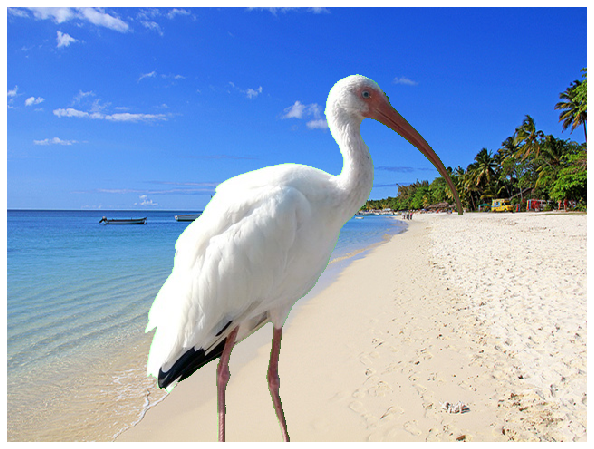

In [110]:
img = cv2.imread(DIR + "chroma.jpg")
img2 = cv2.imread(DIR + "beach.png")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_chroma = (60-10, 100, 100)
upper_chroma = (60+10, 255, 255)

green_screen = cv2.inRange(img_hsv, lower_chroma, upper_chroma)

inverted = cv2.bitwise_not(green_screen)
dst = cv2.bitwise_and(img, img, mask=inverted)   #세그멘테이션(전경)

dst1 = cv2.bitwise_or(dst, img2, mask=green_screen)   # 배경만 취한다.
dst1 = cv2.bitwise_or(dst, dst1)                      #전경더한다.  dst1 = dst + dst1

imshow("", green_screen)
imshow("", inverted)
imshow("", dst)
imshow("", dst1)